# Segmentación de Clientes con K-means y Reducción de Dimensionalidad (PCA)

En este notebook vamos a practicar dos técnicas fundamentales del aprendizaje no supervisado:

- **Clustering (agrupamiento)** usando el algoritmo K-means
- **Reducción de dimensionalidad** con PCA (Análisis de Componentes Principales)

Trabajaremos con datos sintéticos de clientes y analizaremos cómo se pueden segmentar en grupos naturales.

### Librerías necesarias

- `numpy` y `pandas`: para crear y manipular datos
- `matplotlib` y `seaborn`: para graficar
- `sklearn`: para aplicar K-means, escalar datos y realizar PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

### Paso 1: Generación de datos sintéticos de clientes

In [2]:
# Fijamos la semilla para reproducibilidad
np.random.seed(55)
n_clientes = 300

# Grupo 1: Jóvenes con pocos ingresos, compran mucho
edad_jovenes = np.random.normal(25, 5, 100)
ingresos_jovenes = np.random.normal(30000, 8000, 100)
frecuencia_jovenes = np.random.normal(15, 3, 100)

# Grupo 2: Adultos con ingresos medios, compras moderadas
edad_adultos = np.random.normal(40, 8, 100)
ingresos_adultos = np.random.normal(60000, 15000, 100)
frecuencia_adultos = np.random.normal(8, 2, 100)

# Grupo 3: Mayores con altos ingresos, pocas compras
edad_mayores = np.random.normal(55, 10, 100)
ingresos_mayores = np.random.normal(90000, 20000, 100)
frecuencia_mayores = np.random.normal(5, 1, 100)

# Combinamos los datos
datos_clientes = pd.DataFrame({
    'edad': np.concatenate([edad_jovenes, edad_adultos, edad_mayores]),
    'ingresos': np.concatenate([ingresos_jovenes, ingresos_adultos, ingresos_mayores]),
    'frecuencia_compras': np.concatenate([frecuencia_jovenes, frecuencia_adultos, frecuencia_mayores])
})
datos_clientes.describe()

,edad,ingresos,frecuencia_compras
count,300.000000,300.000000,300.000000
mean,39.996170,61114.559395,9.222022
std,14.664641,30265.456040,4.484456
min,13.248771,5068.736324,2.678890
25%,28.083149,33535.460368,5.642060
50%,39.064617,59453.206572,7.748486
75%,49.494203,82802.115769,12.979957
max,80.908345,136831.103570,24.818808


### Paso 2: Normalización de los datos

El algoritmo calcula la distancia entre puntos y centroides usando la distancia euclidiana. Si las variables tienen escalas muy diferentes, las variables con valores más grandes dominarán el cálculo de distancia.

In [3]:
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_clientes)

### Paso 3: Aplicamos K-means para hacer clustering

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) #se ejecutan 10 inicializaciones aleatorias de los centroides
clusters = kmeans.fit_predict(datos_normalizados)
datos_clientes['cluster'] = clusters

# Mostramos estadísticas por cluster
for i in range(3):
    grupo = datos_clientes[datos_clientes['cluster'] == i]
    print(f"\nCluster {i} ({len(grupo)} clientes):")
    print(f"Edad promedio: {grupo['edad'].mean():.1f} años")
    print(f"Ingresos promedio: ${grupo['ingresos'].mean():,.0f}")
    print(f"Frecuencia compras: {grupo['frecuencia_compras'].mean():.1f} / mes")


Cluster 0 (113 clientes):
Edad promedio: 40.2 años
Ingresos promedio: $60,994
Frecuencia compras: 7.5 / mes

Cluster 1 (88 clientes):
Edad promedio: 56.6 años
Ingresos promedio: $96,511
Frecuencia compras: 5.2 / mes

Cluster 2 (99 clientes):
Edad promedio: 25.0 años
Ingresos promedio: $29,789
Frecuencia compras: 14.8 / mes


### Paso 4: Visualización de los clusters en 2D

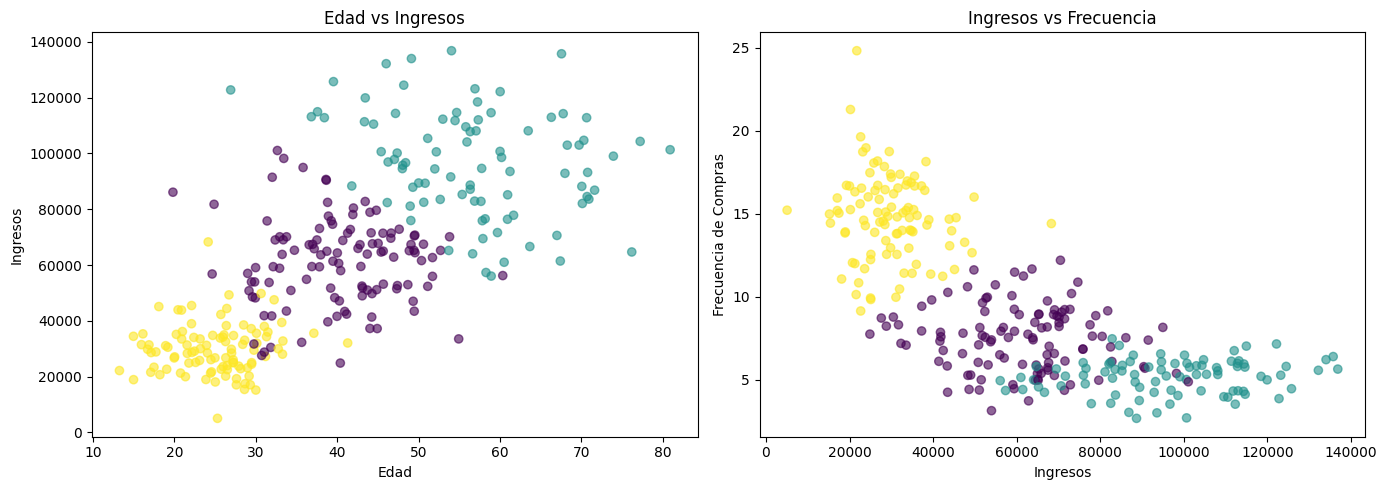

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(datos_clientes['edad'], datos_clientes['ingresos'], c=clusters, cmap='viridis', alpha=0.6)
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Ingresos')
axes[0].set_title('Edad vs Ingresos')

axes[1].scatter(datos_clientes['ingresos'], datos_clientes['frecuencia_compras'], c=clusters, cmap='viridis', alpha=0.6)
axes[1].set_xlabel('Ingresos')
axes[1].set_ylabel('Frecuencia de Compras')
axes[1].set_title('Ingresos vs Frecuencia')
plt.tight_layout()
plt.show()

### Paso 5: Reducción de dimensionalidad con PCA

Varianza explicada:
[0.81359776 0.10068627 0.08571597]


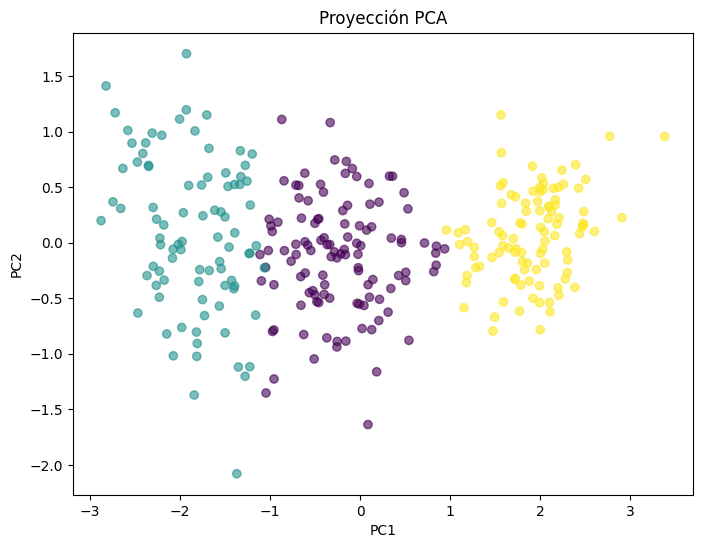

In [11]:
pca = PCA(n_components=3)
datos_pca = pca.fit_transform(datos_normalizados)
print("Varianza explicada:")
print(pca.explained_variance_ratio_)

# Gráfico de los datos proyectados en 2D
plt.figure(figsize=(8,6))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA')
plt.show()

### Paso 6: Predicción de cluster para nuevo cliente

Crea un nuevo cliente con características específicas:

*   35 años de edad
*   $50,000 de ingresos
*   10 compras



In [13]:
nuevo_cliente = np.array([[60, 10000, 2]])

Normaliza/escala las características del nuevo cliente usando el mismo escalador (scaler) que se usó para entrenar el modelo.

In [14]:
nuevo_cliente_norm = scaler.transform(nuevo_cliente)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Usa el modelo K-means ya entrenado para predecir a qué cluster pertenece este nuevo cliente basándose en sus características normalizadas.

In [15]:
prediccion = kmeans.predict(nuevo_cliente_norm)
print(f'Nuevo cliente pertenece al Cluster {prediccion[0]}')

Nuevo cliente pertenece al Cluster 0
